In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline
x_train = pd.read_csv("Training_Set_Values.csv")
x_test = pd.read_csv("Test_Set_values.csv")
y_train = pd.read_csv("Training_Set_Lables.csv")

In [2]:
#concatenat x, y train to make life easier 
data = pd.merge(x_train, y_train, on = 'id')

In [3]:
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

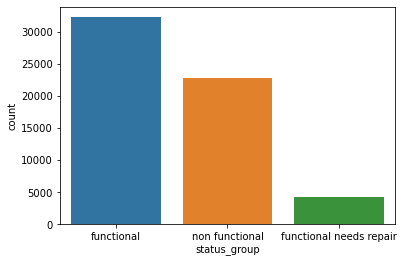

In [5]:
#as we can observe, there is a great inbalance in the clasificatory data, especially "functional, needs repair"
sns.countplot(y_train['status_group'])

## Dealing with dates column

In [6]:
#date_recorded column
# first we transform the date_recorded column into datetime type
data['date_recorded'] = pd.to_datetime(data['date_recorded'])


In [7]:
#we create a new column "last_checked" --> last date - date in order to see how many days have passed since the last check
#remember to DROP REF_DATE column               !!!!!!
data['ref_date'] = pd.datetime(2013,12,3)
data['last_check'] = data['ref_date'] - data['date_recorded']
data.last_check = data.last_check.astype('timedelta64[D]').astype(int)
data['last_check'].describe()

<ipython-input-7-133e57389bd6>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['ref_date'] = pd.datetime(2013,12,3)


count    59400.000000
mean       613.616970
std        334.216374
min          0.000000
25%        297.000000
50%        419.000000
75%        977.000000
max       4068.000000
Name: last_check, dtype: float64

In [8]:
data = data.drop('date_recorded', axis = 1)

In [9]:
#mean of construction year --> 1997

data['construction_year'].loc[data['construction_year'] != 0].mean()

1996.8146855857951

In [10]:
#replace 0's with the mean year 1997
data.construction_year.replace({0: 1997}, inplace = True)

data.construction_year.value_counts()

1997    21353
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

# Population screening 

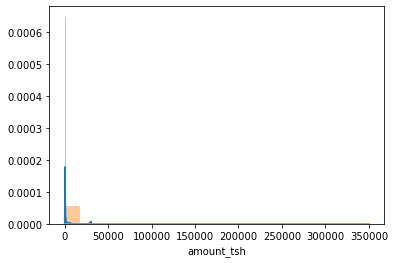

In [11]:
#checking the distribution of population vs distribution of water
sns.distplot(data.population, bins = 20)
sns.distplot(data.amount_tsh, bins = 20)
plt.show()

In [12]:
data.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [13]:
data.amount_tsh.value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [14]:
#should i drop them? --> amount of water avalibale in the waterpoint and population around the well

In [15]:
#assume that they are empty 

In [16]:
#attempt to fill 0's from population by estimating the null and zero values by taking their mean 
#within each district_code or basin and using those values to fill in the missing ones. 
#This technique should give us a more accurate estimate than merely taking the overall average. 
#Additionally, we will take the log of population, although generally speaking the scale of a variable doesn’t 
#affect a random forest model.

## We are now going to go through all features containing Null values

In [17]:
# checking the amount of nulls for every column and the number of unique values
for i in data.columns:
    
    if np.mean(data[i].isnull()) > 0:
        print (i,':' ,'{:.1%}'.format(np.mean(data[i].isnull())),'nulls',',', data[i].nunique(), 'unique values')

funder : 6.1% nulls , 1897 unique values
installer : 6.2% nulls , 2145 unique values
subvillage : 0.6% nulls , 19287 unique values
public_meeting : 5.6% nulls , 2 unique values
scheme_management : 6.5% nulls , 12 unique values
scheme_name : 47.4% nulls , 2696 unique values
permit : 5.1% nulls , 2 unique values


In [18]:
#funder column

data.funder.value_counts()

Government Of Tanzania      9084
Danida                      3114
Hesawa                      2202
Rwssp                       1374
World Bank                  1349
                            ... 
Piscop                         1
District Medical               1
Kigoma Municipal Council       1
Babtist                        1
Juma                           1
Name: funder, Length: 1897, dtype: int64

In [19]:
#group the low value counts into "other"

def funder_other(row):
    
    if row['funder']=='Government Of Tanzania':
        return 'government_of_tanzania'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'  
    elif row['funder']=='Kkkt':
        return 'kkkt'
    elif row['funder']=='World Vision':
        return 'world_vision'
    elif row['funder']=='Unicef':
        return 'unicef'
    else:
        return 'other'
    
data['funder'] = data.apply(lambda row: funder_other(row), axis=1)

In [20]:
#installer column

data.installer.value_counts()

DWE                         17402
Government                   1825
RWE                          1206
Commu                        1060
DANIDA                       1050
                            ...  
Siza Mayengo                    1
Aartisa                         1
world banks                     1
DWEB                            1
Nyabibuye Islamic center        1
Name: installer, Length: 2145, dtype: int64

In [21]:
# group low value count into "other"

def installer_other(row):
    
    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'government'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'
    else:
        return 'other'
    
data['installer'] = data.apply(lambda row: installer_other(row), axis=1)

In [22]:
#subvillages has to many unique values... drop column

data = data.drop("subvillage", axis = 1)

In [23]:
data.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [24]:
# public_meeting column (boolean) --> for its nature we're going to assign random values to it. 
data['public_meeting'] = data['public_meeting'].fillna(np.random.choice(data[data['public_meeting'].isna() == False]['public_meeting']))
data['public_meeting'].value_counts()

#data['public_meeting'] = data['public_meeting']map(lambda x: np.random.choice(data[data["public_meeting"] != np.nan]["column"]))
#data.public_meeting.value_counts()dat#

True     54345
False     5055
Name: public_meeting, dtype: int64

In [25]:
#scheme_management column

data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [26]:
# group the low value counts into "other"

def scheme_other(row):
   
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    else:
        return 'other'

data['scheme_management'] = data.apply(lambda row: scheme_other(row), axis=1)

In [27]:
# scheme_name has almost 50% nulls --> drop this column
data = data.drop("scheme_name", axis = 1)

In [28]:
# permit (boolean) --> for its nature we're going to assign random values to it. 

data['permit'] = data['permit'].fillna(np.random.choice(data[data['permit'].isna() == False]['public_meeting']))
data['permit'].value_counts()

True     41908
False    17492
Name: permit, dtype: int64

## We are now going to go all of the categorical features

In [29]:
cat_cols = data.select_dtypes(include = ['object'])
cat_cols.apply(lambda x: len(x.unique()))

funder                       9
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
recorded_by                  1
scheme_management            6
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [30]:
# wpt_name --> i believe it doesnt add any value, so we drop it

data = data.drop("wpt_name", axis = 1)

In [31]:
#basin column
data.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [32]:
#create a pivot table to see how each basin is doing

    #first we need to add another column "status_group_values" to create the pivot table
vals_to_replace = {'functional':0, 'functional needs repair':1,
                   'non functional':2}
data['status_group_values']  = data.status_group.replace(vals_to_replace)

In [33]:
#create the pivot table

basin_pivot = pd.pivot_table(data, index = ['basin', 'status_group'], 
                             values = ['status_group_values'], aggfunc = 'count')
basin_pivot

status_group_values
basin                   status_group                                
Internal                functional                              4482
                        functional needs repair                  557
                        non functional                          2746
Lake Nyasa              functional                              3324
                        functional needs repair                  250
                        non functional                          1511
Lake Rukwa              functional                              1000
                        functional needs repair                  270
                        non functional                          1184
Lake Tanganyika         functional                              3107
                        functional needs repair                  742
                        non functional                          2583
Lake Victoria           functional                              5100
                        functional needs repair                  989
                        non functional                          4159
Pangani                 functional                              5372
                        functional needs repair                  477
                        non functional                          3091
Rufiji                  functional                              5068
                        functional needs repair                  437
                        non functional                          2471
Ruvuma / Southern Coast functional                              1670
                        functional needs repair                  326
                        non functional                          2497
Wami / Ruvu             functional                              3136
                        functional needs repair                  269
                        non functional                          2582

#### Note how most basins have a mayority of functional pumps except for Lake Rukwa and Ruvuma.

In [35]:
# I proceed to remove region, ida and ward

data = data.drop(['region', 'lga', 'ward'], axis = 1)

In [36]:
# recorded_by has only 1 value (same company did it all)

data = data.drop('recorded_by', axis = 1)

In [37]:
# extraction columns

data.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [38]:
data.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [39]:
data.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [40]:
# extraction_type, extraction_type_group and extraction_type_class appear to contain very similar data

data = data.drop(['extraction_type_group', 'extraction_type'], axis=1)

In [41]:
# management and management_group appear to give the same information as scheme_management...

data = data.drop(['management', 'management_group'], axis = 1)

In [42]:
#payment column

data.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [43]:
data.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [44]:
#we drop data.payment_type.

data = data.drop('payment_type', axis = 1)

In [45]:
#water_quality column

data.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [46]:
data.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [47]:
#we drop quality_group for having the same values

data = data.drop('quality_group', axis = 1)

In [48]:
# quantity column

data.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [49]:
data.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [50]:
#we drop quantity_group for having the same values

data = data.drop('quantity_group', axis = 1)

In [51]:
# source column

data.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [52]:
data.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [53]:
data.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [54]:
# source and source_type have identical info.

data = data.drop('source_type', axis = 1)

In [55]:
#waterpoint column

data.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [56]:
data.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [57]:
#they have practically the same values, so we proceed to drop the first one

data = data.drop('waterpoint_type', axis = 1)

In [58]:
# gps_height, longitude, latitude, region_code and district_code are all geographic info which has already been 
#provided by other features.
# 'num_private' hasn't been given a discription on Driven Data, and it doesnt seem to give any relevant data
# id doesnt add any valuable info


data = data.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
             'num_private', 'id', 'ref_date'], axis=1)

In [59]:
cat_cols.apply(lambda x: len(x.unique()))

funder                       9
installer                    6
wpt_name                 37400
basin                        9
region                      21
lga                        125
ward                      2092
recorded_by                  1
scheme_management            6
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

In [60]:
#drop the y relatied columns as they no longer have a purpose 
data = data.drop(['status_group_values', 'status_group'], axis = 1)

In [61]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   installer              59400 non-null  object 
 3   basin                  59400 non-null  object 
 4   population             59400 non-null  int64  
 5   public_meeting         59400 non-null  bool   
 6   scheme_management      59400 non-null  object 
 7   permit                 59400 non-null  bool   
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  payment                59400 non-null  object 
 11  water_quality          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source                 59400 non-null  object 
 14  source_class           59400 non-null  object 
 15  wa

(59400, 17)

# Apply all of the above to the test set

In [62]:
#date columns
x_test['date_recorded'] = pd.to_datetime(x_test['date_recorded'])
x_test['ref_date'] = pd.datetime(2013,12,3)
x_test['last_check'] = x_test['ref_date'] - x_test['date_recorded']
x_test.last_check = x_test.last_check.astype('timedelta64[D]').astype(int)


x_test.construction_year.replace({0: 1997}, inplace = True)

#Drop all of the 'usless' columns 
x_test = x_test.drop(["subvillage", "scheme_name", "wpt_name", 'region', 'lga', 'ward', 'recorded_by',
                      'extraction_type_group', 'extraction_type', 'management', 'management_group',
                      'payment_type', 'quality_group', 'quantity_group', 'source_type', 'waterpoint_type',
                      'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'num_private',
                      'id', 'ref_date', "date_recorded"], axis = 1)

# binning into others
x_test['funder'] = x_test.apply(lambda row: funder_other(row), axis=1)
x_test['installer'] = x_test.apply(lambda row: installer_other(row), axis=1)
x_test['scheme_management'] = x_test.apply(lambda row: scheme_other(row), axis=1)

#ramdom fillers 
x_test['public_meeting'] = x_test['public_meeting'].fillna(np.random.choice(x_test[x_test['public_meeting'].isna() == False]['public_meeting']))
x_test['permit'] = x_test['permit'].fillna(np.random.choice(x_test[x_test['permit'].isna() == False]['permit']))

<ipython-input-62-44b7d36236fe>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  x_test['ref_date'] = pd.datetime(2013,12,3)


In [63]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   funder                 14850 non-null  object 
 2   installer              14850 non-null  object 
 3   basin                  14850 non-null  object 
 4   population             14850 non-null  int64  
 5   public_meeting         14850 non-null  bool   
 6   scheme_management      14850 non-null  object 
 7   permit                 14850 non-null  bool   
 8   construction_year      14850 non-null  int64  
 9   extraction_type_class  14850 non-null  object 
 10  payment                14850 non-null  object 
 11  water_quality          14850 non-null  object 
 12  quantity               14850 non-null  object 
 13  source                 14850 non-null  object 
 14  source_class           14850 non-null  object 
 15  wa

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   funder                 59400 non-null  object 
 2   installer              59400 non-null  object 
 3   basin                  59400 non-null  object 
 4   population             59400 non-null  int64  
 5   public_meeting         59400 non-null  bool   
 6   scheme_management      59400 non-null  object 
 7   permit                 59400 non-null  bool   
 8   construction_year      59400 non-null  int64  
 9   extraction_type_class  59400 non-null  object 
 10  payment                59400 non-null  object 
 11  water_quality          59400 non-null  object 
 12  quantity               59400 non-null  object 
 13  source                 59400 non-null  object 
 14  source_class           59400 non-null  object 
 15  wa

In [65]:
print('this is the test shape: ', x_test.shape)
print('this is the datas shape: ', data.shape)

this is the test shape:  (14850, 17)
this is the datas shape:  (59400, 17)


In [66]:
x_test.head()

,amount_tsh,funder,installer,basin,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,payment,water_quality,quantity,source,source_class,waterpoint_type_group,last_check
0,0.0,other,other,Internal,321,True,other,True,2012,other,never pay,soft,seasonal,rainwater harvesting,surface,other,302
1,0.0,government_of_tanzania,dwe,Pangani,300,True,vwc,True,2000,gravity,never pay,soft,insufficient,spring,groundwater,communal standpipe,302
2,0.0,other,other,Internal,500,True,vwc,True,2010,other,never pay,soft,insufficient,rainwater harvesting,surface,other,305
3,0.0,other,other,Ruvuma / Southern Coast,250,True,vwc,True,1987,other,unknown,soft,dry,shallow well,groundwater,other,315
4,500.0,other,other,Ruvuma / Southern Coast,60,True,wtr_brd,True,2000,gravity,pay monthly,soft,enough,spring,groundwater,communal standpipe,251


## Save both to csv files

In [67]:
xx
data.to_csv('pump_train_for_models.csv', index=False)

x_test.to_csv('pump_test_for_models.csv', index=False)

NameError: name 'xx' is not defined